In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

# Load the dataset from the Excel file
file_path = '../data/raw/PSP_Jan_Feb_2019.xlsx'
df = pd.read_excel(file_path)

# Datenbeschreibung

In [16]:
# Display the first few rows of the dataframe
df.head()

,index,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


* Index
* tmsp: Zeitstempel der Transaktion.
* country: Herkunftsland der Transaktion
* amount: Betrag der Transaktion
* success: Erfolg der Transaktion (1 für Erfolg, 0 für Misserfolg).
* PSP: Payment Service Provider
* 3D_secured: Ob die Transaktion 3D-gesichert ist (1 für ja, 0 für nein)
* card: Kartentyp.

In [17]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(index         0
 tmsp          0
 country       0
 amount        0
 success       0
 PSP           0
 3D_secured    0
 card          0
 dtype: int64,
 index                  int64
 tmsp          datetime64[ns]
 country               object
 amount                 int64
 success                int64
 PSP                   object
 3D_secured             int64
 card                  object
 dtype: object)

In [18]:
df.describe()

,index,tmsp,amount,success,3D_secured
count,50410.000000,50410,50410.000000,50410.000000,50410.000000
mean,25204.500000,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,0.000000,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,12602.250000,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,25204.500000,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,37806.750000,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,50409.000000,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,14552.257872,NaN,96.274730,0.402160,0.426027


# Visualisation of the variables

/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christopheressmann/Documen

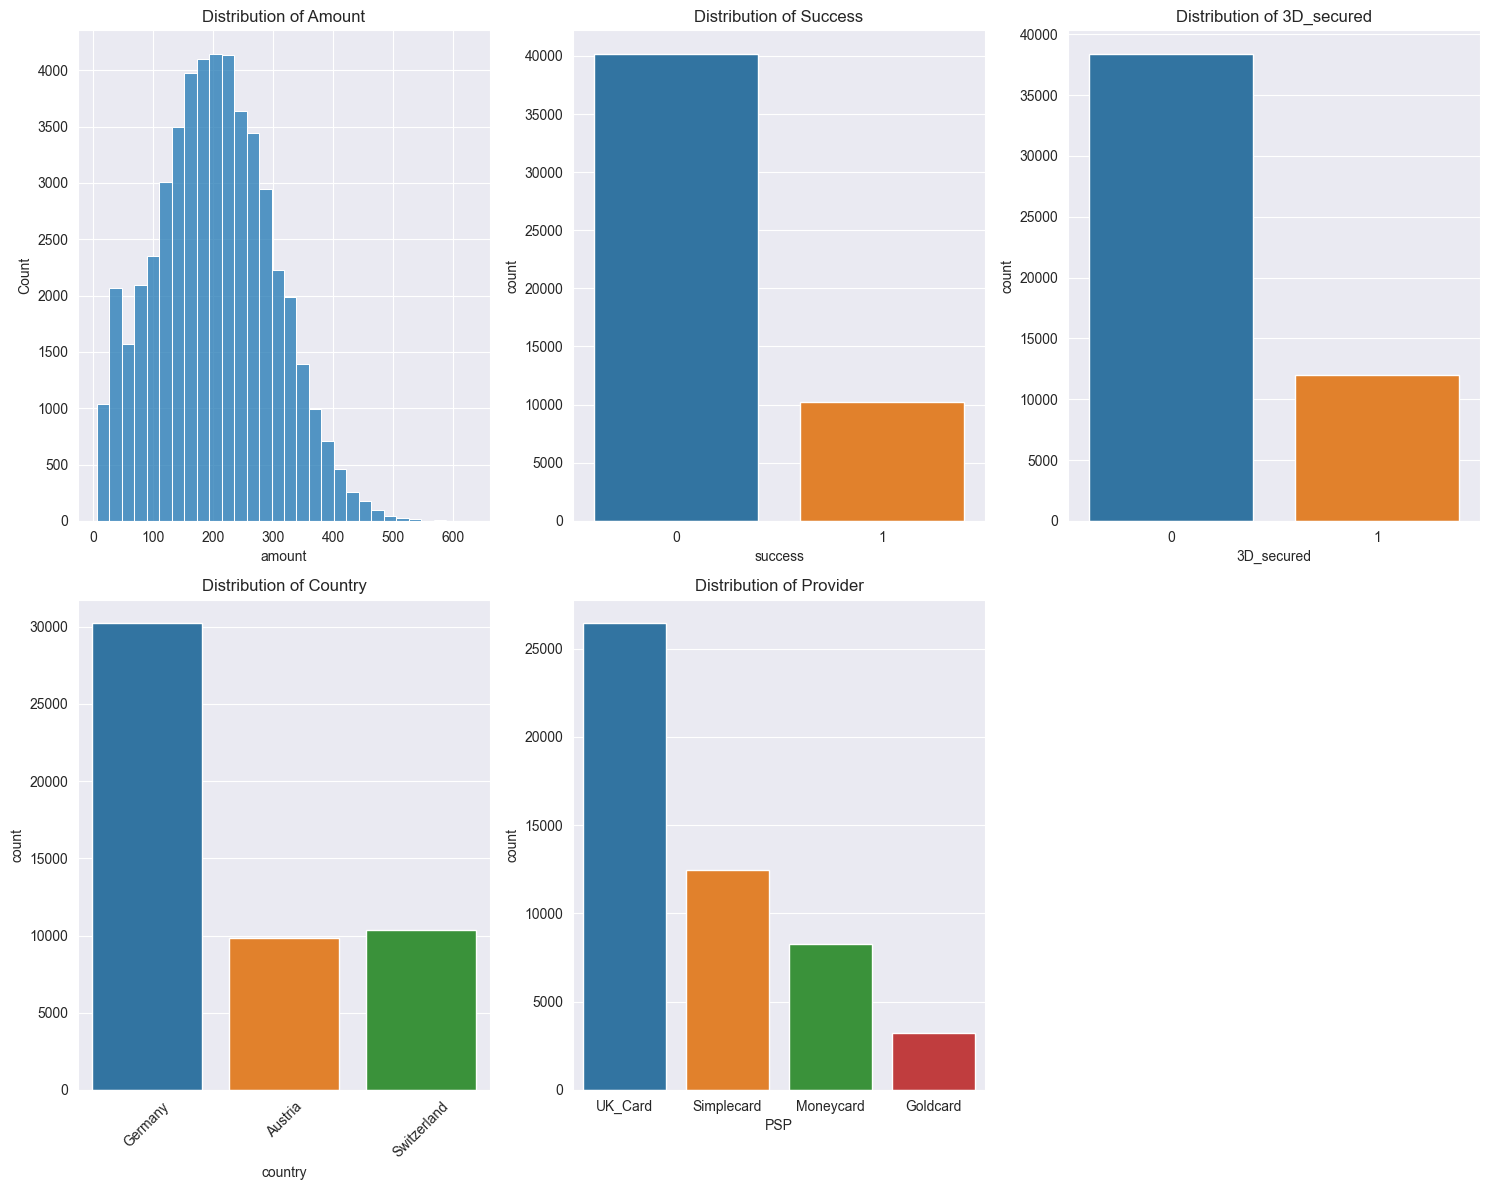

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Plotting the distribution of numerical variables
plt.subplot(2, 3, 1)
sns.histplot(df['amount'], kde=False, bins=30)
plt.title('Distribution of Amount')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='success')
plt.title('Distribution of Success')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='3D_secured')
plt.title('Distribution of 3D_secured')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='country')
plt.title('Distribution of Country')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='PSP')
plt.title('Distribution of Provider')

plt.tight_layout()
plt.show()


## Visualisation of outliers

/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christopheressmann/Documents/GitHub/model_engineering_creditdata/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


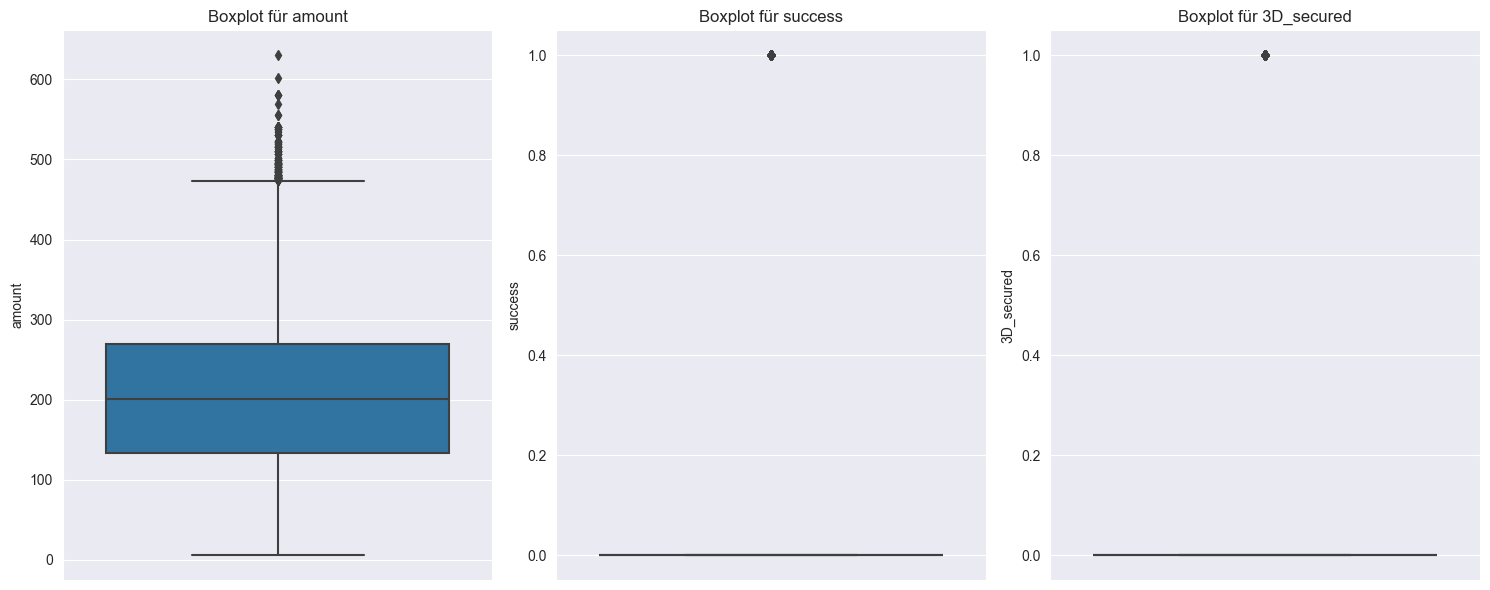

In [20]:
# Plot boxplots to identify outliers in numerical columns
numerical_columns = ['amount', 'success', '3D_secured']

plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot für {col}')

plt.tight_layout()
plt.show()


In [22]:
# Read fee data
fees_df_read = pd.read_excel('../data/raw/PSP_Fees.xlsx')
print(fees_df_read)

          PSP  success   fee
0   Moneycard        1   5.0
1    Goldcard        1  10.0
2     UK_Card        1   3.0
3  Simplecard        1   1.0
4   Moneycard        0   2.0
5    Goldcard        0   5.0
6     UK_Card        0   1.0
7  Simplecard        0   0.5
